In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../datasets/MentalHealth_Train.csv")
df.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [4]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [5]:
#Rename the column Name
df.rename(columns={'Working Professional or Student':'working_or_student',
                      'Academic Pressure':'academic_pressure',
                      'Work Pressure':'work_pressure',
                      'Study Satisfaction':'study_satisfaction',
                      'Job Satisfaction':'job_satisfaction',
                      'Sleep Duration':'sleep_duration',
                      'Dietary Habits':'dietary_habits',
                      'Work/Study Hours':'work_study_hours',
                      'Financial Stress':'financial_stress',
                     'Have you ever had suicidal thoughts ?':'suicide_ideation',
                     'Family History of Mental Illness':'family_history'},inplace=True)
df.head()

,id,Name,Gender,Age,City,working_or_student,Profession,academic_pressure,work_pressure,CGPA,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,Degree,suicide_ideation,work_study_hours,financial_stress,family_history,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [6]:
#shape
df.shape

(140700, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  140700 non-null  int64  
 1   Name                140700 non-null  object 
 2   Gender              140700 non-null  object 
 3   Age                 140700 non-null  float64
 4   City                140700 non-null  object 
 5   working_or_student  140700 non-null  object 
 6   Profession          104070 non-null  object 
 7   academic_pressure   27897 non-null   float64
 8   work_pressure       112782 non-null  float64
 9   CGPA                27898 non-null   float64
 10  study_satisfaction  27897 non-null   float64
 11  job_satisfaction    112790 non-null  float64
 12  sleep_duration      140700 non-null  object 
 13  dietary_habits      140696 non-null  object 
 14  Degree              140698 non-null  object 
 15  suicide_ideation    140700 non-nul

In [8]:
# Checking for missing value in each column
missing_info = pd.DataFrame()
for col_name,col_val in df.items():
  missing_info1 = pd.DataFrame({
        'Missing Count': col_val.isnull().sum(),
        'Missing Percentage': (col_val.isnull().sum() / len(col_val) * 100).round(0)},index=[col_name])
  missing_info = pd.concat([missing_info,missing_info1])
print(missing_info[missing_info['Missing Count']>0])

                    Missing Count  Missing Percentage
Profession                  36630                26.0
academic_pressure          112803                80.0
work_pressure               27918                20.0
CGPA                       112802                80.0
study_satisfaction         112803                80.0
job_satisfaction            27910                20.0
dietary_habits                  4                 0.0
Degree                          2                 0.0
financial_stress                4                 0.0


In [9]:
#The missing values in certain columns are likely due to the nature of the dataset, where individuals fall into distinct categories—working professionals or students—with different relevant attributes.

In [10]:
#Academic pressure and work pressure , study_satisfaction and job_satisfaction column replacing Nan with 0
df.fillna({'academic_pressure':0,'work_pressure':0,'study_satisfaction':0,'job_satisfaction':0},inplace=True)
df

,id,Name,Gender,Age,City,working_or_student,Profession,academic_pressure,work_pressure,CGPA,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,Degree,suicide_ideation,work_study_hours,financial_stress,family_history,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,NaN,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,NaN,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,NaN,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,NaN,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,0.0,5.0,NaN,0.0,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,0.0,5.0,NaN,0.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,0.0,3.0,NaN,0.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,0.0,5.0,NaN,0.0,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [11]:
# Sleeping duration
df['sleep_duration'].value_counts()

sleep_duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

In [12]:
#Cleaning sleeping duration
sleep_mapping = {
    "1-2 hours": 1, "1-3 hours": 1, "1-6 hours": 2,
    "2-3 hours": 2, "3-4 hours": 2, "4-5 hours": 3,
    "5-6 hours": 4, "6-7 hours": 4, "7-8 hours": 5,
    "8-9 hours": 6, "10-11 hours":6,
    "More than 8 hours": 6, "Less than 5 hours":3,
}

df['sleep_duration'] = df['sleep_duration'].apply(lambda x: sleep_mapping[x] if x in sleep_mapping else 3)
df

,id,Name,Gender,Age,City,working_or_student,Profession,academic_pressure,work_pressure,CGPA,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,Degree,suicide_ideation,work_study_hours,financial_stress,family_history,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,NaN,0.0,2.0,6,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,NaN,0.0,3.0,3,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,0.0,8.97,2.0,0.0,4,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,NaN,0.0,1.0,3,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,NaN,0.0,1.0,4,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,0.0,5.0,NaN,0.0,4.0,4,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,0.0,5.0,NaN,0.0,4.0,5,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,0.0,3.0,NaN,0.0,1.0,6,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,0.0,5.0,NaN,0.0,2.0,4,Moderate,ME,Yes,10.0,1.0,No,0


In [13]:
df['sleep_duration'].value_counts()

sleep_duration
3    38828
5    36969
6    32730
4    32150
2       21
1        2
Name: count, dtype: int64

In [14]:
# dietary_habits
df['dietary_habits'].value_counts()

dietary_habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
More Healthy             2
No                       2
Pratham                  1
Gender                   1
BSc                      1
Less than Healthy        1
3                        1
1.0                      1
Hormonal                 1
Electrician              1
Mihir                    1
No Healthy               1
Less Healthy             1
M.Tech                   1
Vegas                    1
Male                     1
Indoor                   1
Class 12                 1
2                        1
Name: count, dtype: int64

In [15]:
dietary_mapping = {
    "Healthy": 2, "Moderate": 1, "Unhealthy": 0,
    "Less Healthy": 0, "Less than Healthy": 0,
    "No Healthy": 0, "More Healthy": 2
}
df['dietary_habits'] = df['dietary_habits'].apply(lambda x: dietary_mapping[x] if x in dietary_mapping else 1)
df

,id,Name,Gender,Age,City,working_or_student,Profession,academic_pressure,work_pressure,CGPA,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,Degree,suicide_ideation,work_study_hours,financial_stress,family_history,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,NaN,0.0,2.0,6,2,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,NaN,0.0,3.0,3,0,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,0.0,8.97,2.0,0.0,4,2,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,NaN,0.0,1.0,3,1,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,NaN,0.0,1.0,4,0,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,0.0,5.0,NaN,0.0,4.0,4,0,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,0.0,5.0,NaN,0.0,4.0,5,1,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,0.0,3.0,NaN,0.0,1.0,6,1,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,0.0,5.0,NaN,0.0,2.0,4,1,ME,Yes,10.0,1.0,No,0


In [16]:
#CGPA missing value    112802                80.0%
df.groupby('working_or_student')['CGPA'].count()

working_or_student
Student                 27892
Working Professional        6
Name: CGPA, dtype: int64

In [17]:
df['CGPA'] = df['CGPA'].fillna(0)
df

,id,Name,Gender,Age,City,working_or_student,Profession,academic_pressure,work_pressure,CGPA,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,Degree,suicide_ideation,work_study_hours,financial_stress,family_history,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.00,0.0,2.0,6,2,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.00,0.0,3.0,3,0,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,0.0,8.97,2.0,0.0,4,2,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.00,0.0,1.0,3,1,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.00,0.0,1.0,4,0,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,0.0,5.0,0.00,0.0,4.0,4,0,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,0.0,5.0,0.00,0.0,4.0,5,1,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,0.0,3.0,0.00,0.0,1.0,6,1,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,0.0,5.0,0.00,0.0,2.0,4,1,ME,Yes,10.0,1.0,No,0


In [18]:

df['CGPA'].value_counts()

CGPA
0.0000    112802
8.0400       822
9.9600       425
5.7400       410
8.9500       371
           ...  
6.6400         1
7.0625         1
6.9800         1
6.4400         1
6.0900         1
Name: count, Length: 332, dtype: int64

In [19]:
#Scale down CGPA to 1 to 5
def cg(cgpa_10):
  if cgpa_10 >= 9.0:
    return 5.0
  elif cgpa_10 >= 8.0:
    return 4.0
  elif cgpa_10 >= 7.0:
    return 3.5
  elif cgpa_10 >= 6.0:
    return 3.0
  elif cgpa_10 >= 5.0:
    return 2.5
  elif cgpa_10 >= 4.0:
     return 2.0
  elif cgpa_10 >= 3.0:
    return 1.5
  elif cgpa_10 >= 2.0:
    return 1
  else:
    return 0
  
df['CGPA'] = df['CGPA'].apply(cg)
df

,id,Name,Gender,Age,City,working_or_student,Profession,academic_pressure,work_pressure,CGPA,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,Degree,suicide_ideation,work_study_hours,financial_stress,family_history,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.0,0.0,2.0,6,2,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.0,0.0,3.0,3,0,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,0.0,4.0,2.0,0.0,4,2,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.0,0.0,1.0,3,1,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.0,0.0,1.0,4,0,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,0.0,5.0,0.0,0.0,4.0,4,0,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,0.0,5.0,0.0,0.0,4.0,5,1,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,0.0,3.0,0.0,0.0,1.0,6,1,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,0.0,5.0,0.0,0.0,2.0,4,1,ME,Yes,10.0,1.0,No,0


In [20]:
# working_or_student - 
# Gender  - 
# suicide_ideation
# family_history

print(df['Gender'].value_counts())
print('\n')
print(df['working_or_student'].value_counts())
print('\n')
print(df['suicide_ideation'].value_counts())
print('\n')
print(df['family_history'].value_counts())

Gender
Male      77464
Female    63236
Name: count, dtype: int64


working_or_student
Working Professional    112799
Student                  27901
Name: count, dtype: int64


suicide_ideation
No     71138
Yes    69562
Name: count, dtype: int64


family_history
No     70758
Yes    69942
Name: count, dtype: int64


In [21]:
# converting to numeric value
# working_or_student
# Gender  - 
# suicide_ideation
# family_history

gender_mapping = {
    "Male": 0,
    "Female": 1,
}

working_student_mapping = {
    "Working Professional": 1,
    "Student": 0
}

suicidal_thoughts_mapping = {
    "Yes": 1,
    "No": 0
}

family_history_mapping = {
    "Yes": 1,
    "No": 0
}

df['Gender'] = df['Gender'].map(gender_mapping)
df['working_or_student'] = df['working_or_student'].map(working_student_mapping)
df['suicide_ideation'] = df['suicide_ideation'].map(suicidal_thoughts_mapping)
df['family_history'] = df['family_history'].map(family_history_mapping)
df

,id,Name,Gender,Age,City,working_or_student,Profession,academic_pressure,work_pressure,CGPA,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,Degree,suicide_ideation,work_study_hours,financial_stress,family_history,Depression
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,0.0,5.0,0.0,0.0,2.0,6,2,BHM,0,1.0,2.0,0,0
1,1,Vivan,0,26.0,Varanasi,1,Teacher,0.0,4.0,0.0,0.0,3.0,3,0,LLB,1,7.0,3.0,0,1
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,0.0,4.0,2.0,0.0,4,2,B.Pharm,1,3.0,1.0,0,1
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,0.0,5.0,0.0,0.0,1.0,3,1,BBA,1,10.0,1.0,1,1
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,0.0,1.0,0.0,0.0,1.0,4,0,BBA,1,9.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,0.0,5.0,0.0,0.0,4.0,4,0,Class 12,0,2.0,4.0,1,1
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,0.0,5.0,0.0,0.0,4.0,5,1,B.Tech,1,6.0,5.0,1,0
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,0.0,3.0,0.0,0.0,1.0,6,1,B.Com,0,4.0,4.0,0,0
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,0.0,5.0,0.0,0.0,2.0,4,1,ME,1,10.0,1.0,0,0


In [58]:
df['financial_stress'] = df['financial_stress'].fillna(df['financial_stress'].mean())

In [59]:
df.columns


Index(['id', 'Name', 'Gender', 'Age', 'City', 'working_or_student',
       'Profession', 'academic_pressure', 'work_pressure', 'CGPA',
       'study_satisfaction', 'job_satisfaction', 'sleep_duration',
       'dietary_habits', 'Degree', 'suicide_ideation', 'work_study_hours',
       'financial_stress', 'family_history', 'Depression'],
      dtype='object')

In [60]:
clean_Data = df[['Gender','Age', 'working_or_student',
       'academic_pressure', 'work_pressure', 'CGPA',
       'study_satisfaction', 'job_satisfaction', 'sleep_duration',
       'dietary_habits', 'suicide_ideation', 'work_study_hours',
       'financial_stress', 'family_history', 'Depression']]
clean_Data.head()

,Gender,Age,working_or_student,academic_pressure,work_pressure,CGPA,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,suicide_ideation,work_study_hours,financial_stress,family_history,Depression
0,1,49.0,1,0.0,5.0,0.0,0.0,2.0,6,2,0,1.0,2.0,0,0
1,0,26.0,1,0.0,4.0,0.0,0.0,3.0,3,0,1,7.0,3.0,0,1
2,0,33.0,0,5.0,0.0,4.0,2.0,0.0,4,2,1,3.0,1.0,0,1
3,0,22.0,1,0.0,5.0,0.0,0.0,1.0,3,1,1,10.0,1.0,1,1
4,1,30.0,1,0.0,1.0,0.0,0.0,1.0,4,0,1,9.0,4.0,1,0


In [61]:
clean_Data.shape

(140700, 15)

In [62]:
clean_Data.describe()

,Gender,Age,working_or_student,academic_pressure,work_pressure,CGPA,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,suicide_ideation,work_study_hours,financial_stress,family_history,Depression
count,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000
mean,0.449439,40.388621,0.801699,0.623028,2.403930,0.729471,0.583902,2.384385,4.451692,0.989431,0.494399,6.252679,2.988983,0.497100,0.181713
std,0.497439,12.384099,0.398722,1.395493,1.736255,1.517359,1.321153,1.736185,1.125128,0.804032,0.499970,3.853615,1.413613,0.499993,0.385609
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,42.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,4.000000,1.000000,0.000000,6.000000,3.000000,0.000000,0.000000
75%,1.000000,51.000000,1.000000,0.000000,4.000000,0.000000,0.000000,4.000000,5.000000,2.000000,1.000000,10.000000,4.000000,1.000000,0.000000
max,1.000000,60.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,2.000000,1.000000,12.000000,5.000000,1.000000,1.000000


<Axes: >

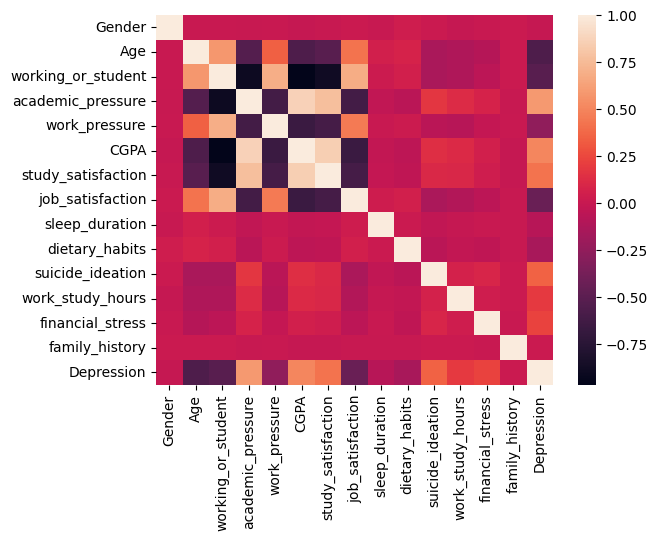

In [63]:
import seaborn as sns
sns.heatmap(clean_Data.corr())


In [64]:
X = clean_Data.drop(columns=["Depression"])
Y = clean_Data["Depression"]

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
print("The Shape of X:",X.shape)
print("The Shape of X_train:",X_train.shape)
lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_test_pred = lr.predict(X_test)
accuracy_score(Y_test,y_test_pred)

The Shape of X: (140700, 14)
The Shape of X_train: (105525, 14)


0.9371428571428572

In [67]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
print("The Shape of X:",X.shape)
print("The Shape of X_train:",X_train.shape)
lr = RandomForestClassifier()
lr.fit(X_train,Y_train)
y_test_pred = lr.predict(X_test)
accuracy_score(Y_test,y_test_pred)

The Shape of X: (140700, 14)
The Shape of X_train: (105525, 14)


0.9345273631840796

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
print("The Shape of X:",X.shape)
print("The Shape of X_train:",X_train.shape)
lr = GradientBoostingClassifier()
lr.fit(X_train,Y_train)
y_test_pred = lr.predict(X_test)
accuracy_score(Y_test,y_test_pred)

The Shape of X: (140700, 14)
The Shape of X_train: (105525, 14)


0.9376261549395878

In [69]:
import pickle
pickle.dump(lr,open("../models/MentalHealth.pkl","wb"))